### Loading the Packages

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings("ignore")

2024-01-13 02:37:35.104910: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-13 02:37:35.314044: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-13 02:37:36.172781: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/aamiz_z/miniconda3/envs/fvgpu/lib/:/home/aamiz_z/miniconda3/envs/fvgpu/lib/python3.10/site-packages/nvidia/cudnn/lib
2024-01-13 02:37:36.172953: W tensorflow/stream_executor/platform/default/dso_loader.cc:

### Loading the model

In [2]:
model_path = 'vgg_model.h5'  # Update with your actual model path
model = load_model(model_path)

### load the classes file
with open('label_encoder_classes.pkl', 'rb') as pickle_file:
    loaded_classes = pickle.load(pickle_file)

print("Loaded LabelEncoder classes:")
print(loaded_classes)

2024-01-13 02:37:37.884662: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-13 02:37:37.915600: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-13 02:37:37.915801: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-13 02:37:37.916462: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Loaded LabelEncoder classes:
['mild' 'normal' 'severe']


In [3]:
def get_predictions(model,img):
    img = cv2.imread(img)[:,:,::-1]
    img = cv2.resize(img,(224,224))
    img = img/255
    plt.imshow(img)
    img = np.reshape(img,(1,224,224,3))
    pred = model.predict(img)
    pred= np.argmax(pred,axis=-1)
    return pred

2024-01-13 02:37:38.965328: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8600
2024-01-13 02:37:39.042318: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-13 02:37:39.043169: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-13 02:37:39.043208: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2024-01-13 02:37:39.043984: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-13 02:37:39.044065: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-01-13 02:37:39.086053: W tensorflow/core/common_runtime/bf

1/1 [==============================] - 1s 585ms/step


2024-01-13 02:37:39.173286: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.06GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-01-13 02:37:39.190781: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 459.25MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-01-13 02:37:39.202597: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.05GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-01-13 02:37:39.238665: W tensorflow/core/common_runtime/bfc_alloca

The predicted class is mild


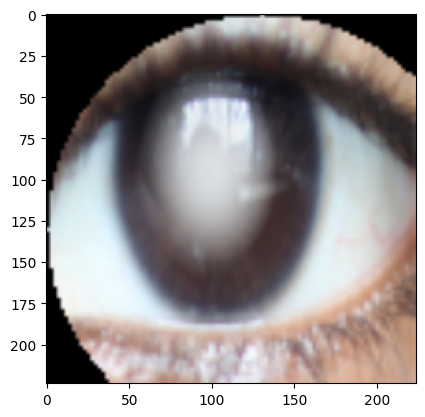

In [4]:
pred = get_predictions(model,'test1_mild.png')
print(f"The predicted class is {loaded_classes[pred[0]]}")

1/1 [==============================] - 0s 19ms/step
The predicted class is normal


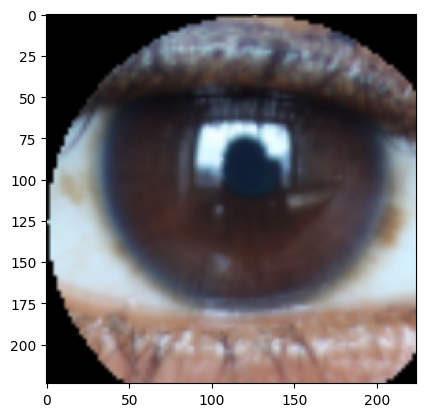

In [5]:
pred = get_predictions(model,'test2_normal.png')
print(f"The predicted class is {loaded_classes[pred[0]]}")

1/1 [==============================] - 0s 32ms/step
The predicted class is severe


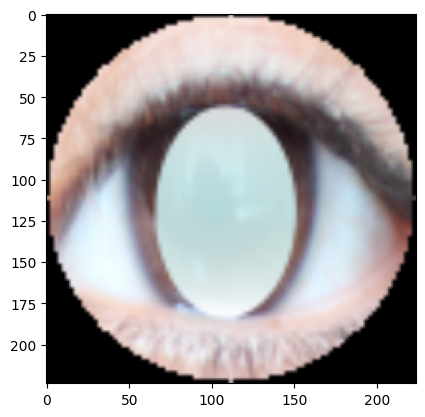

In [6]:
pred = get_predictions(model,'test3_severe.png')
print(f"The predicted class is {loaded_classes[pred[0]]}")